In [1]:
import os
sep_local = os.path.sep
sep_local

In [2]:
%env TF_KERAS = 1


Compute dtype: float16
Variable dtype: float32


In [3]:
import sys
sys.path.append('..' + sep_local + '..' + sep_local + '..') # For Windows import

'2.0.0'

In [4]:
import os
os.chdir('..' + sep_local + '..' + sep_local + '..') # For Linux import

In [5]:
# from tensorflow.keras.mixed_precision import experimental as mixed_precision
# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_policy(policy)
# print('Compute dtype: %s' % policy.compute_dtype)
# print('Variable dtype: %s' % policy.variable_dtype)

tfds.core.DatasetInfo(
    name='dsprites',
    version=0.1.0,
    description='dSprites is a dataset of 2D shapes procedurally generated from 6 ground truth
independent latents factors. These factors are *color*, *shape*, *scale*,
*rotation*, *x* and *y* positions of a sprite.

All possible combinations of these latents are present exactly once,
generating N = 737280 total images.

### Latent factor values

*   Color: white
*   Shape: square, ellipse, heart
*   Scale: 6 values linearly spaced in [0.5, 1]
*   Orientation: 40 values in [0, 2 pi]
*   Position X: 32 values in [0, 1]
*   Position Y: 32 values in [0, 1]

We varied one latents at a time (starting from Position Y, then Position X, etc),
and sequentially stored the images in fixed order.
Hence the order along the first dimension is fixed and allows you to map back to
the value of the latents corresponding to that image.

We chose the latents values deliberately to have the smallest step changes
while ensuring that all pixel ou

In [6]:
import tensorflow as tf
#tf.keras.backend.set_floatx('float32')
tf.__version__

In [7]:
dataset_name = 'dsprites'
import tensorflow_datasets as tfds

info = tfds.builder(dataset_name).info

print(info)

In [ ]:
import tensorflow_datasets as tfds

info = tfds.builder(dataset_name).info

print(info)

In [ ]:
import tensorflow as tf

In [ ]:
train_ds = tf.data.Dataset.from_generator(
    lambda: training_generator, 
    output_types=tf.float32 ,
    output_shapes=tf.TensorShape((batch_size, ) + image_size)
)

test_ds = tf.data.Dataset.from_generator(
    lambda: testing_generator, 
    output_types=tf.float32 ,
    output_shapes=tf.TensorShape((batch_size, ) + image_size)
)


In [8]:
intermediate_dim = 20
inputs_shape=(64, 64, 1) # image shape
batch_size = 32
latents_dim = 50

In [9]:
TRAIN_BUF = 600
TEST_BUF = 100


In [10]:
import tensorflow_datasets as tfds
# Construct a tf.data.Dataset
train_ds = tfds.load(name=dataset_name, split=tfds.Split.TRAIN).shuffle(TRAIN_BUF).batch(batch_size)
try:
    test_ds = tfds.load(name=dataset_name, split=tfds.Split.TEST).shuffle(TEST_BUF).batch(batch_size)
except:
    test_ds = tfds.load(name=dataset_name, split=tfds.Split.TRAIN).shuffle(TEST_BUF).batch(batch_size)


1.0

In [ ]:
_instance_scale=1.0
for data in train_ds:
    _instance_scale = float(data['image'][0].numpy().max())
    break

In [12]:
enc_mean_lays = [tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu')]

enc_var_lays = [tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu')]

dec_lays = [tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu')]

In [13]:
#from utils.data_and_files.file_utils import make_random_string
#from time import gmtime, strftime

#model_name = 'AE_' + make_random_string(5) + strftime("%a_%d_%b_%Y_%H_%M", gmtime())
#print(model_name)

In [ ]:
import os
model_name = dataset_name + 'Dense' +'AE'
#experiments_dir='..'+sep_local+'..'+sep_local+'..'+sep_local+'experiments'+sep_local + model_name
os.getcwd()
experiments_dir=os.getcwd()+ sep_local  +'experiments'+sep_local + model_name

In [ ]:
from os.path import abspath
absolute = abspath(experiments_dir)
print("Recording_dir",absolute)
print("Current working dir",os.getcwd())

In [16]:
from training.autoencoding_basic.autoencoders.VAE import VAE

In [19]:
variables_params = \
[
    {
        'name': 'inference_mean', 
        'inputs_shape':inputs_shape,
        'outputs_shape':latents_dim,
        'layers': enc_mean_lays
    },

    {
    'name': 'inference_logvariance', 
    'inputs_shape':inputs_shape,
    'outputs_shape':latents_dim,
    'layers': enc_var_lays
    }
    ,
    
        {
        'name': 'generative', 
        'inputs_shape':latents_dim,
        'outputs_shape':inputs_shape,
        'layers':dec_lays
    }
]

In [20]:
from utils.data_and_files.file_utils import create_if_not_exist
_restore = os.path.join(experiments_dir, 'var_save_dir')
create_if_not_exist(_restore)
absolute = abspath(_restore)
print("Restore_dir",absolute)

In [21]:
ae = VAE( 
    name=model_name,
    latents_dim=latents_dim,
    batch_size=batch_size,
    variables_params=variables_params, 
    filepath=None #to restore trained model, set filepath=_restore
    )

'..\\experiments\\dspritesVAE\\var_save_dir'

In [22]:
#ae.compile(metrics=None)
ae.compile()

Model: "inference_mean"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64, 64, 20)        40        
_________________________________________________________________
dense_3 (Dense)              (None, 64, 64, 20)        420       
_________________________________________________________________
dense_4 (Dense)              (None, 64, 64, 20)        420       
_________________________________________________________________
flatten_1 (Flatten)          (None, 81920)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                4096050   
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)             

  WARNING  | None


Model: "inference_logvariance"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64, 64, 20)        40        
_________________________________________________________________
dense_6 (Dense)              (None, 64, 64, 20)        420       
_________________________________________________________________
dense_7 (Dense)              (None, 64, 64, 20)        420       
_________________________________________________________________
flatten_2 (Flatten)          (None, 81920)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                4096050   
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)      

  WARNING  | None


Model: "generative"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
flatten_3 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 4096)              167936    
_________________________________________________________________
batch_normalization_2 (Batch (None, 4096)              16384     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0

  WARNING  | None


In [23]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

from training.callbacks.sample_generation import SampleGeneration
from training.callbacks.save_model import ModelSaver

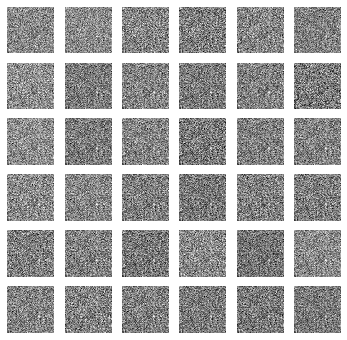

  ERROR    | No former training found ... 
Epochs Progress:   0%|                                                                          | 0/10 [00:00<?, ?it/s]

  INFO     | Training ... 
Epochs Progress, Training Iterations 1:   0%|                                                   | 0/10 [03:04<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    min_delta=1e-12, 
    patience=12, 
    verbose=1, 
    restore_best_weights=False
)

In [ ]:
ms = ModelSaver(filepath=_restore)

In [ ]:
csv_dir = os.path.join(experiments_dir, 'csv_dir')
create_if_not_exist(csv_dir)
csv_dir = os.path.join(csv_dir, model_name+'.csv')
csv_log = tf.keras.callbacks.CSVLogger(csv_dir, append=True)
absolute = abspath(csv_dir)
print("Csv_dir",absolute)

In [ ]:
image_gen_dir = os.path.join(experiments_dir, 'image_gen_dir')
create_if_not_exist(image_gen_dir)
absolute = abspath(image_gen_dir)
print("Image_gen_dir",absolute)

In [ ]:
sg = SampleGeneration(latents_shape=6, filepath=image_gen_dir, gen_freq=5, save_img=True, gray_plot=True)

In [ ]:
#DATA_DOWN_PATH = '..'+sep_local+'..'+sep_local+'..'+sep_local+'data'
DATA_DOWN_PATH = os.getcwd() + sep_local+'data'
Script_dir = os.getcwd() + sep_local+'data'+sep_local+'download_gt_data.sh'
# Script call to download "dsprites_full" dataset_name 
!/bin/bash $Script_dir -f $DATA_DOWN_PATH -d $dataset_name

In [ ]:
from data.gt_load.datasets import load
DATA_PATH = DATA_DOWN_PATH +sep_local+'.gt_datasets'
absolute = abspath(DATA_PATH)
print("DATA_PATH",absolute)

In [ ]:
eval_dataset = load(dataset_name='dsprites_full', dataset_path=DATA_PATH)

In [ ]:
gts_csv = os.path.join(experiments_dir, 'csv_dir', 'gts_metrics')
gtu_csv = os.path.join(experiments_dir, 'csv_dir', 'gtu_metrics')

In [ ]:
import numpy as np

In [ ]:
from training.callbacks.disentangle_supervied import DisentanglementSuperviedMetrics
from training.callbacks.disentangle_unsupervied import DisentanglementUnsuperviedMetrics

In [ ]:
gts_mertics = DisentanglementSuperviedMetrics(            
    ground_truth_data=eval_dataset,
    representation_fn=lambda x: ae.encode(inputs={'x_mean': x, 'x_logvariance': x})['z_latents'],
    random_state=np.random.RandomState(0),
    file_Name=gts_csv,
    num_train=1000,
    num_test=200,
    batch_size=batch_size,
    continuous_factors=False,
    gt_freq=2
)
gtu_mertics = DisentanglementUnsuperviedMetrics(            
    ground_truth_data=eval_dataset,
    representation_fn=lambda x: ae.encode(inputs={'x_mean': x, 'x_logvariance': x})['z_latents'],
    random_state=np.random.RandomState(0),
    file_Name=gtu_csv,
    num_train=1000,
    num_test=200,
    batch_size=batch_size,
    gt_freq=2
)

In [ ]:
ae.fit(
    x=train_ds,
    steps_per_epoch=int(1e4),
    epochs=100, 
    verbose=1,
    callbacks=[ es, ms, csv_log, sg, gts_mertics, gtu_mertics],
    workers=-1,
    use_multiprocessing=True
)
